In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
san_train = pd.read_csv('/content/drive/My Drive/SAN_FRANCISO_CRIME/train.csv')

In [ ]:
san_test = pd.read_csv('/content/drive/My Drive/SAN_FRANCISO_CRIME/test.csv')

In [ ]:
san_train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [ ]:
san_test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [ ]:
san_train.shape,san_test.shape

((878049, 9), (884262, 7))

In [ ]:
san_train.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [ ]:
san_train.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [ ]:
# checking if there is any null values
san_train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [ ]:
# splittting into year , week and hours
san_train['year'] = san_train['Dates'].apply(lambda x : x.split()[0].split('-')[0])
san_train['Week'] = san_train['Dates'].apply(lambda x : x.split()[0].split('-')[1])
san_train['Hours'] = san_train['Dates'].apply(lambda x : x.split()[1].split(':')[0])

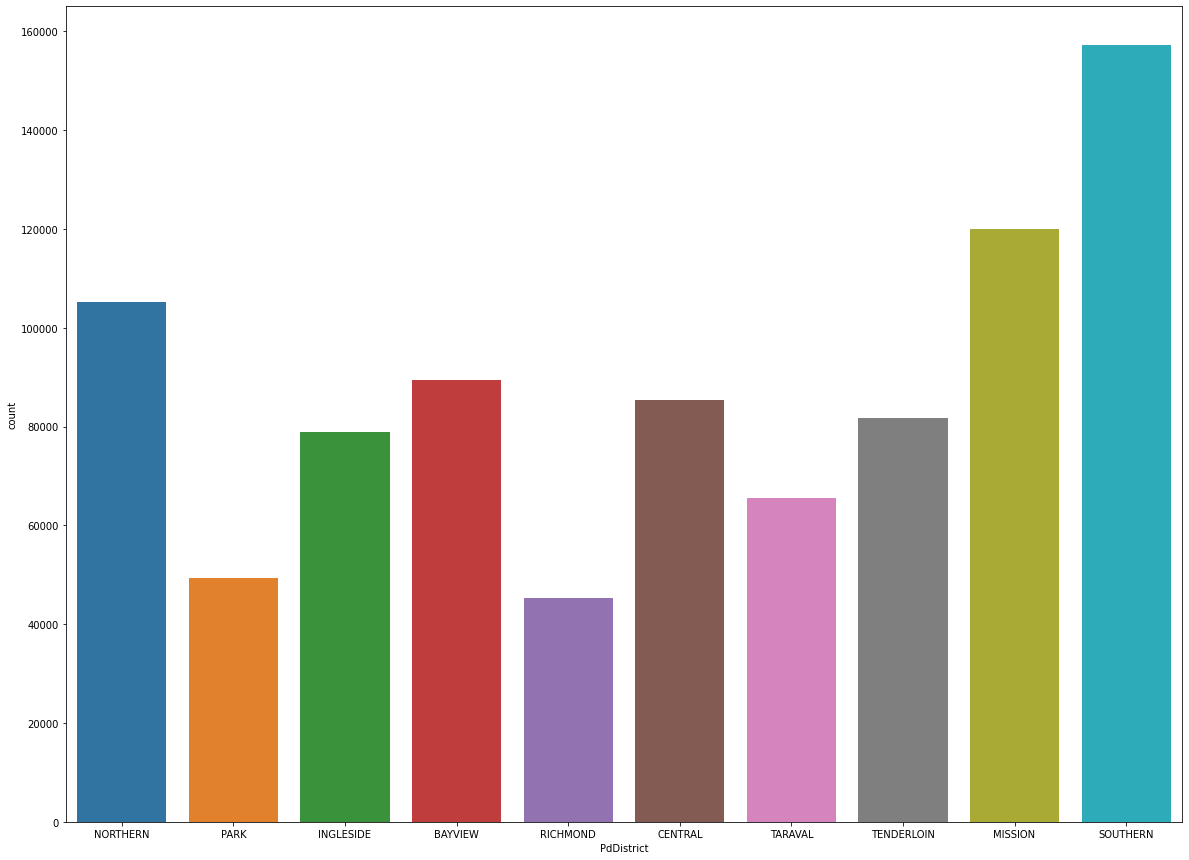

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(x="PdDistrict", data=san_train)

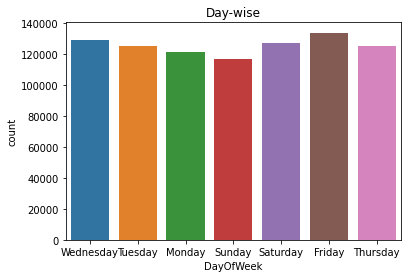

In [ ]:
sns.countplot(san_train['DayOfWeek'])
plt.title('Day-wise');

In [ ]:
target = san_train['Category'].unique()
print(target)

['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']


In [ ]:
data_dict = {}
count = 1
for data in target:
    data_dict[data] = count
    count+=1
san_train["Category"] = san_train["Category"].replace(data_dict)

In [ ]:
dayofweeks = san_train['DayOfWeek'].unique()
print(dayofweeks)

['Wednesday' 'Tuesday' 'Monday' 'Sunday' 'Saturday' 'Friday' 'Thursday']


In [ ]:
data_week_dict = {
    "Monday":1,
    "Tuesday":2,
    "Wednesday":3,
    "Thursday":4,
    "Friday":5,
    "Saturday":6,
    "Sunday":7
}

In [ ]:
san_train['DayOfWeek'] = san_train['DayOfWeek'].replace(data_week_dict)
san_test['DayOfWeek'] = san_test['DayOfWeek'].replace(data_week_dict)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

san_train['PdDistrict'] = labelencoder.fit_transform(san_train['PdDistrict'])
san_test['PdDistrict'] = labelencoder.fit_transform(san_test['PdDistrict'])

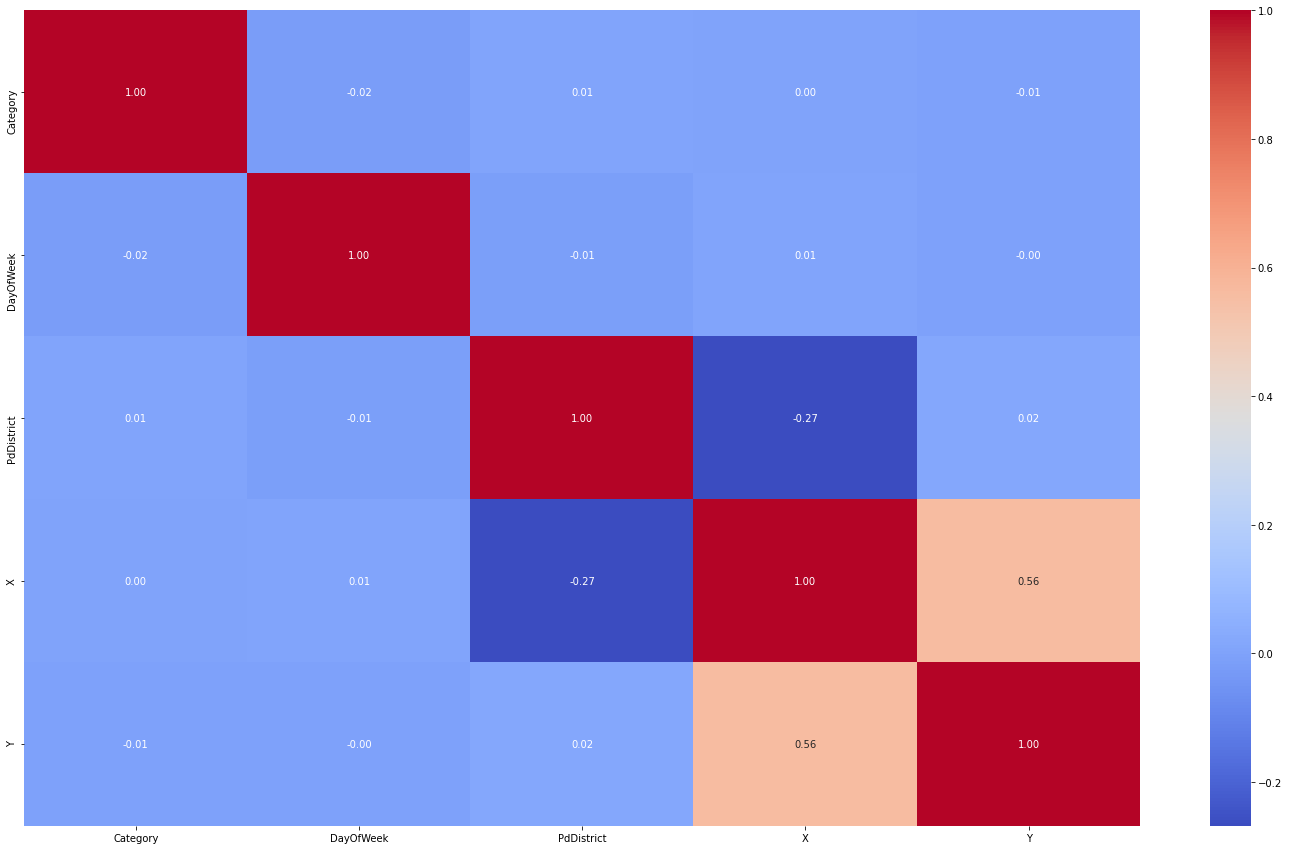

In [ ]:
# to find the correlation we can use heat map 
f,ax = plt.subplots(figsize=(25,15))
sns.heatmap(san_train.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [ ]:
feautes = ["DayOfWeek","PdDistrict","X","Y"]

In [ ]:
X_train = san_train[feautes]
y_train = san_train['Category']
X_test = san_test[feautes]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [ ]:
from collections import OrderedDict
data_dict_new = OrderedDict(sorted(data_dict.items()))
print(data_dict_new)

OrderedDict([('ARSON', 26), ('ASSAULT', 8), ('BAD CHECKS', 36), ('BRIBERY', 29), ('BURGLARY', 10), ('DISORDERLY CONDUCT', 25), ('DRIVING UNDER THE INFLUENCE', 22), ('DRUG/NARCOTIC', 14), ('DRUNKENNESS', 12), ('EMBEZZLEMENT', 30), ('EXTORTION', 34), ('FAMILY OFFENSES', 27), ('FORGERY/COUNTERFEITING', 13), ('FRAUD', 19), ('GAMBLING', 35), ('KIDNAPPING', 20), ('LARCENY/THEFT', 3), ('LIQUOR LAWS', 28), ('LOITERING', 32), ('MISSING PERSON', 18), ('NON-CRIMINAL', 6), ('OTHER OFFENSES', 2), ('PORNOGRAPHY/OBSCENE MAT', 39), ('PROSTITUTION', 24), ('RECOVERED VEHICLE', 38), ('ROBBERY', 7), ('RUNAWAY', 21), ('SECONDARY CODES', 16), ('SEX OFFENSES FORCIBLE', 23), ('SEX OFFENSES NON FORCIBLE', 33), ('STOLEN PROPERTY', 15), ('SUICIDE', 31), ('SUSPICIOUS OCC', 11), ('TREA', 37), ('TRESPASS', 17), ('VANDALISM', 5), ('VEHICLE THEFT', 4), ('WARRANTS', 1), ('WEAPON LAWS', 9)])


In [ ]:
result_dataframe = pd.DataFrame({
    "Id": san_test["Id"]
})
for key,value in data_dict_new.items():
    result_dataframe[key] = 0
count = 0
for item in predictions:
    for key,value in data_dict.items():
        if(value == item):
            result_dataframe[key][count] = 1
    count+=1
result_dataframe.to_csv("submission_knn.csv", index=False)